# Part B Problem 

Let $B_n$ denote that $n \times n$ matrix with $(i, j)$'th enntry equal to:


$$
\begin{aligned}
b_{ij} = \begin{cases}
\frac{1}{2j- i^2}, &\text{ if } i > j \\
\frac{i}{i- j}+  \frac{1}{n^2- j - i}, &\text{ if } j>i \\
0 &\text{ if } i = j
\end{cases}
\end{aligned}
$$



Look at the numerical values of the determinant of $B_n$ for $3≤n≤30$ and display these values graphically. You should observe that the values seem to follow a pattern.

  Look at the sequence and show  that  the  $n-\log{}$  or  $\log$-$\log$  transformation  gives  a  fit  that  is  approximately  linear  and  hence obtain  and  test  a  formula  that  predicts  the  value  of  the  sequence.   Define  a  function  that  predicts the value of the determinant of $Bn$.
  
What is the largest percentage error that your formula has for $30≤n≤50$?


## Preamble

In [129]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()

# Printing
init_printing(use_latex='mathjax', latex_mode='equation')

# Clipboard
import pyperclip
def lx(expr):
    pyperclip.copy(latex(expr))
    print(expr)


## Create the Matrix

Expressions in `Sympy` are generally immutable, matrices are the exception to this. A consequence of this is that attributes of matrix objects **occur in place**.

In order to generate an empty matrix the `zeros` function can be used:

In [130]:
n = 2
mymat = zeros(n, n)
mymat
# mymat.row(2)[1] = 7 

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

Then the values of the matrix may be modified by looping through the array:

In [131]:
for i in range(mymat.shape[0]):
    for j in range(mymat.shape[1]):
        print("(" + str(i) + "," + str(j) + ")")

(0,0)
(0,1)
(1,0)
(1,1)


and so to assign the values based on the condition in the problem:

In [132]:
def BuildMat(n):
    mymat = zeros(n,n)
    for i in range(n):
        for j in range(n):
            # Increment i and j by one because they count from zero
            i += 1; j += 1
            if (i > j):
                v = 1/(2*j - i**2)
            elif (j > i):
                v = 1/(i-j) + 1/(n**2 - j - i)
            else:
                v = 0
            # Decrement i and j so the index lines up
            i -= 1; j -= 1
            mymat[j, i] = v
    return mymat

BuildMat(3)


⎡        0           -0.5   -0.142857142857143⎤
⎢                                             ⎥
⎢-0.833333333333333    0           -0.2       ⎥
⎢                                             ⎥
⎣       -0.3         -0.75          0         ⎦

## Find the Determinant

In [133]:
def detMat(n):
    return Determinant(BuildMat(n)).doit()
detMat(2)



0

## Find the Determinant of Various Values

In [134]:
# We double all numbers using map() 
result = map(detMat, range(30)) 
# print(list(result))
[round(num, 3) for num in list(result)]

[1, 0, 0, -0.119, -0.035, -0.018, -0.013, -0.01, -0.008, -0.006, -0.005, -0.00
4, -0.004, -0.003, -0.003, -0.002, -0.002, -0.002, -0.002, -0.001, -0.001, -0.
001, -0.001, -0.001, -0.e-3, -0.e-3, -0.e-3, -0.e-3, -0.e-3, -0.e-3]

### Instead use absolute value

In [135]:
def detMat(n):
    return abs(Determinant(BuildMat(n)).doit())
detMat(2)
result = map(detMat, range(30)) 

[round(num, 3) for num in list(result)]

[1, 0, 0, 0.119, 0.035, 0.018, 0.013, 0.01, 0.008, 0.006, 0.005, 0.004, 0.004,
 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 
0.001, 0.001, 0.001, 0.001, 0.001, 0.001]

### Create a Data Frame

In [136]:
import pandas as pd

data = {'Matrix.Size': range(30),
        'Determinant.Value': list(map(detMat, range(30)))
}



df = pd.DataFrame(data, columns = ['Matrix.Size', 'Determinant.Value'])

print(df)

Matrix.Size     Determinant.Value
0             0                     1
1             1                     0
2             2                     0
3             3     0.119285714285714
4             4    0.0352575763181824
5             5    0.0180622054313475
6             6    0.0130234795781754
7             7   0.00995884317994898
8             8   0.00782184559014832
9             9   0.00628840304169881
10           10   0.00515839836598470
11           11   0.00430448116137098
12           12   0.00364462792217378
13           13   0.00312470891044082
14           14   0.00270804216246506
15           15   0.00236913494508374
16           16   0.00208985860358642
17           17   0.00185705171809406
18           18   0.00166097999794876
19           19   0.00149432281296443
20           20   0.00135149140850168
21           21   0.00122816088486413
22           22   0.00112094292575809
23           23   0.00102715304986957
24           24  0.000944642506540081
25           25 

### Plot the Data frame

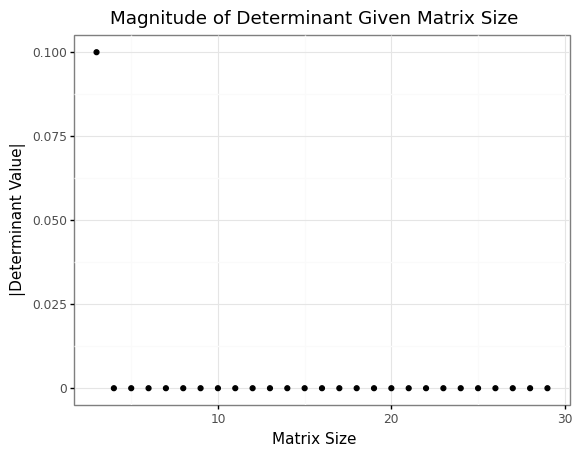

<ggplot: (8792019375204)>

In [137]:
from plotnine import *

df_plot = df[3:]
df_plot
df_plot['Determinant.Value'] = df_plot['Determinant.Value'].astype(float).round(1)

(
    ggplot(df_plot, aes(x = 'Matrix.Size', y = 'Determinant.Value')) +
        geom_point() +
        theme_bw() +
        labs(x = "Matrix Size", y = "|Determinant Value|") +
        ggtitle('Magnitude of Determinant Given Matrix Size')

)



    

In this case it appears that the determinant scales exponentially, we can attempt to model that linearly using `scikit`, this is significantly more complex than simply using ***R***. [^lrpy]

[^lrpy]: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

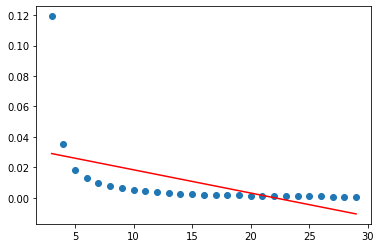

In [138]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

df_slice = df[3:]

X = df_slice.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_slice.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions



plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

array([5.37864677])

## Log Transform the Data

In [139]:
# pyperclip.copy(df.columns[0])
df['Determinant.Value'] = [ log(val).expand(force = True) for val in df['Determinant.Value']]
df


,Matrix.Size,Determinant.Value
0,0,0
1,1,zoo
2,2,zoo
3,3,-2.12623370318660
4,4,-3.34507484180595
5,5,-4.01393362154157
6,6,-4.34100142919850
7,7,-4.60929436072264
8,8,-4.85083474330028
9,9,-5.06904812894707


In order to only have well defined values, consider only after size 3

In [140]:
df_plot = df[3:]
df_plot

,Matrix.Size,Determinant.Value
3,3,-2.12623370318660
4,4,-3.34507484180595
5,5,-4.01393362154157
6,6,-4.34100142919850
7,7,-4.60929436072264
8,8,-4.85083474330028
9,9,-5.06904812894707
10,10,-5.26712914185992
11,11,-5.44809866837230
12,12,-5.61450099769660


A limitation of the *Python* `plotnine` library (compared to *Ggplot2* in ***R***) is that it isn't possible to round values in the `aesthetics` layer, a further limitation with `pandas` also exists when compared to ***R*** that makes rounding data very clusy to do.

In order to round data use the `numpy` library:

In [141]:
import pandas as pd
import numpy as np
df_plot['Determinant.Value'] = df_plot['Determinant.Value'].astype(float).round(1)
df_plot

,Matrix.Size,Determinant.Value
3,3,-2.1
4,4,-3.3
5,5,-4.0
6,6,-4.3
7,7,-4.6
8,8,-4.9
9,9,-5.1
10,10,-5.3
11,11,-5.4
12,12,-5.6


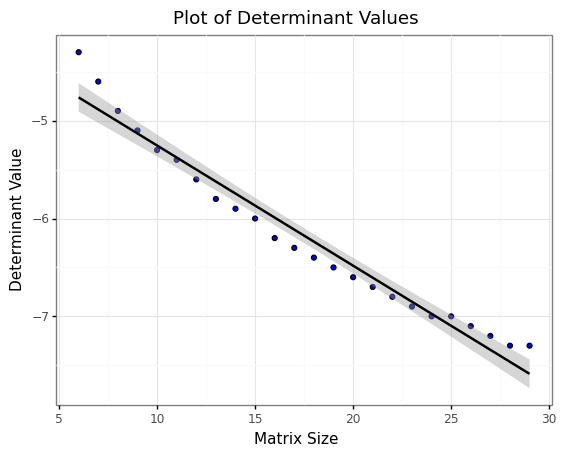

<ggplot: (8792020268587)>

In [142]:
from plotnine import *


(ggplot(df_plot[3:], aes(x = 'Matrix.Size', y = 'Determinant.Value')) +
   geom_point(fill= "Blue") +
   labs(x = "Matrix Size", y = "Determinant Value",
        title = "Plot of Determinant Values") +
   theme_bw() +
   stat_smooth(method = 'lm')
)

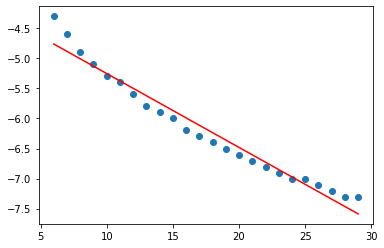

In [143]:
from sklearn.linear_model import LinearRegression

df_slice = df_plot[3:]

X = df_slice.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_slice.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions



plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [144]:
m = linear_regressor.fit(X, Y).coef_[0][0]
b = linear_regressor.fit(X, Y).intercept_[0]

print("y = " + str(m.round(2)) + "* x" + str(b.round(2)))


y = -0.12* x-4.02


So the model is:

$$
\text{abs}(\text{Det}(M)) = -4n - 0.12
$$

where:
- $n$ is the size of the square matrix

## Largest Percentage Error

To find the largest percentage error for $n \in [30, 50]$ it will be necessary to calculate the determinants for the larger range, compressing all the previous steps and calculating the model based on the larger amount of data:

In [145]:
import pandas as pd

data = {'Matrix.Size': range(30, 50),
        'Determinant.Value': list(map(detMat, range(30, 50)))
}
df = pd.DataFrame(data, columns = ['Matrix.Size', 'Determinant.Value'])
df['Determinant.Value'] = [ log(val).expand(force = True) for val in df['Determinant.Value']]
df
from sklearn.linear_model import LinearRegression


X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

m = linear_regressor.fit(X, Y).coef_[0][0]
b = linear_regressor.fit(X, Y).intercept_[0]

print("y = " + str(m.round(2)) + "* x" + str(b.round(2)))




y = -0.05* x-5.92


In [148]:
Y_hat = linear_regressor.predict(X)
res_per = (Y - Y_hat)/Y_hat

max_res = np.max(res_per)
max_ind = np.where(res_per == max_res)[0][0] + 30

print("The Maximum Percentage error is " + str(max_res.round(2) * 100) + "% which corresponds to a matrix of size " + str(max_ind))



The Maximum Percentage error is 0% which corresponds to a matrix of size 39


In [147]:
## Observe that there is no `which` function, instead:

## For Lists

my_list = [3, 2, 1, 55, 7, 8]
max_value = max(my_list)
max_index = my_list.index(max_value)
print(max_index, max_value)

## For Numpy
v = np.random.randn(10)
print(v)
maximum = np.max(v)
minimum = np.min(v)
print(maximum, minimum)

index_of_maximum = np.where(v == maximum)
index_of_minimum = np.where(v == minimum)

3 55
